ARPU: $15.00
Gross Margin %: 60.00%
Churn Rate: 10.00%
LTV: $9000.00
Root Mean Squared Error (RMSE): 2.07
R-squared (Coefficient of Determination): 0.99


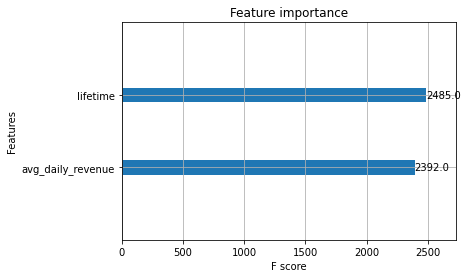

In [28]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

n_users = 10000
n_active_users = 3000
revenue_per_user = 50
cogs_per_user = 20
churn_rate = 0.1

user_ids = range(1, n_users + 1)

user_df = pd.DataFrame({'user_id': user_ids})

active_users = np.random.choice(user_ids, n_active_users, replace=False)
user_df['is_active'] = user_df['user_id'].isin(active_users)

user_df['registration_date'] = pd.date_range(start='2020-01-01', periods=n_users, freq='D')
user_df['last_activity_date'] = pd.NaT
user_df.loc[user_df['is_active'], 'last_activity_date'] = pd.date_range(start='2020-01-01', periods=len(active_users), freq='D')

total_revenue = n_active_users * revenue_per_user
arpu = total_revenue / n_users

total_cogs = n_active_users * cogs_per_user
gross_margin = ((total_revenue - total_cogs) / total_revenue) * 100

churn_rate = churn_rate

ltv = (arpu * gross_margin) / churn_rate

print(f"ARPU: ${arpu:.2f}")
print(f"Gross Margin %: {gross_margin:.2f}%")
print(f"Churn Rate: {churn_rate:.2%}")
print(f"LTV: ${ltv:.2f}")

n_users = 10000

activity_prob = 0.03
active_users = np.random.choice(np.arange(1, n_users + 1), size=int(n_users * activity_prob), replace=False)

user_df = pd.DataFrame({'user_id': np.arange(1, n_users + 1)})
user_df['is_active'] = user_df['user_id'].isin(active_users)
user_df['registration_date'] = pd.date_range(start='2020-01-01', periods=n_users, freq='D')
user_df['last_activity_date'] = pd.NaT
user_df.loc[user_df['is_active'], 'last_activity_date'] = pd.date_range(start='2020-01-01', periods=len(active_users), freq='D')

user_df['revenue'] = np.random.randint(1, 100, size=n_users)

user_df['lifetime'] = np.random.randint(1, 365, size=n_users)

user_df['avg_daily_revenue'] = user_df['revenue'] / user_df['lifetime']

user_df['LTV'] = user_df.apply(lambda row: row['avg_daily_revenue'] * row['lifetime'], axis=1)

X = user_df[['lifetime', 'avg_daily_revenue']]
y = user_df['LTV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_regressor = xgb.XGBRegressor(objective="reg:squarederror")

xgb_regressor.fit(X_train, y_train)

y_pred = xgb_regressor.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r_squared = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (Coefficient of Determination): {r_squared:.2f}")

xgb.plot_importance(xgb_regressor)
plt.show()
